In [91]:
%matplotlib qt5

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
import re
from wordcloud import WordCloud, STOPWORDS # Wordcloud: pip install wordcloud
import plotly.plotly as py

In [2]:
sns.set()
pd.options.display.max_columns = None
py.plotly.tools.set_credentials_file(username='tbotalla', api_key='zfkG3X8bXKe7m5oXfswC')

In [3]:
types = {
 "event" : "category", 
 "person" : "category", 
 "url" : "category", 
 "sku" : "category", 
 "model" : "category", 
 "condition" : "category", 
 "storage" : "category", 
 "color" : "category", 
 "staticpage" : "category", 
 "campaign_source" : "category", 
 "search_engine" : "category", 
 "channel" : "category", 
 "new_vs_returning" : "category", 
 "city" : "category", 
 "region" : "category", 
 "country" : "category", 
 "device_type" : "category", 
 "screen_resolution" : "category", 
 "operating_system_version" : "category", 
 "browser_version" : "category", 
}

events = pd.read_csv("fiuba-trocafone-tp1-final-set/events.csv", parse_dates=["timestamp"], dtype=types)

# **Analisis eventos**

In [4]:
events.dtypes

timestamp                   datetime64[ns]
event                             category
person                            category
url                               category
sku                               category
model                             category
condition                         category
storage                           category
color                             category
skus                                object
search_term                         object
staticpage                        category
campaign_source                   category
search_engine                     category
channel                           category
new_vs_returning                  category
city                              category
region                            category
country                           category
device_type                       category
screen_resolution                 category
operating_system_version          category
browser_version                   category
dtype: obje

In [93]:
events.head(3)

timestamp            event    person                        url  \
0 2018-05-31 23:38:05  ad campaign hit  0004b0a2  /comprar/iphone/iphone-5s   
1 2018-05-31 23:38:05     visited site  0004b0a2                        NaN   
2 2018-05-31 23:38:09   viewed product  0004b0a2                        NaN   

      sku      model condition storage           color skus search_term  \
0     NaN        NaN       NaN     NaN             NaN  NaN         NaN   
1     NaN        NaN       NaN     NaN             NaN  NaN         NaN   
2  2694.0  iPhone 5s       Bom    32GB  Cinza espacial  NaN         NaN   

  staticpage campaign_source search_engine channel new_vs_returning  \
0        NaN          criteo           NaN     NaN              NaN   
1        NaN             NaN           NaN    Paid              New   
2        NaN             NaN           NaN     NaN              NaN   

         city      region country device_type screen_resolution  \
0         NaN         NaN     NaN         NaN               NaN   
1  Camaragibe  Pernambuco  Brazil  Smartphone           360x640   
2         NaN         NaN     NaN         NaN               NaN   

  operating_system_version   browser_version  
0                      NaN               NaN  
1                Android 6  Chrome Mobile 39  
2                      NaN               NaN

In [8]:
events['event'].isnull().any()

False

In [9]:
events['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

# Analisis búsquedas de los usuarios

**Evento searched products, busqueda dentro del sitio**

In [10]:
searched_products_events = events[events["event"] == "searched products"].dropna(axis=1, how='all')
searched_products_events.notnull().any()

timestamp      True
event          True
person         True
skus           True
search_term    True
dtype: bool

In [11]:
len(searched_products_events[searched_products_events['search_term'] == ""])

0

In [12]:
searched_products_events.dropna(subset=['search_term'], inplace=True)
searched_products_events['search_term'].value_counts().head(1)

Iphone    1207
Name: search_term, dtype: int64

In [13]:
sns_plot = sns.countplot(y="search_term", data=searched_products_events, palette="Greens_d",
              order=searched_products_events.search_term.value_counts().iloc[:35].index)
sns_plot.set_title("Búsquedas más frecuentes")
sns_plot.set_yticklabels(sns_plot.get_yticklabels(), fontsize=6.5)
fig = sns_plot.get_figure()
fig.savefig("img/busquedas-frecuentes.png", bbox_inches = 'tight', label='small')
sns_plot

In [14]:
global_words = []
stopwords = ['nan']

def process_words(row, col):  
    words = row[col].split()
    valid_words = []
    for word in words:
        for w in stopwords:
            if (word.lower() == w):
                word = word.lower().replace(w, '')
        if (word != ''):
            valid_words.append(word)
        
    global_words.extend(valid_words) 
    return row

In [15]:
searched_products_events['search_term'] = searched_products_events['search_term'].astype(str)
searched_products_events = searched_products_events.apply(lambda row: process_words(row, 'search_term'), axis=1)

In [16]:
from wordcloud import (WordCloud, get_single_color_func)
text = ''
for word in global_words:
    text += ' ' + word
wordcloud = WordCloud(relative_scaling = 0.4,
                      stopwords = stopwords, width=800, height=600,
                      background_color="black", collocations=False
                      ).generate(text)
# Coloreo por marca
class GroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

color_to_words = {
    # Apple
    'green': ['Iphone', 'Iphone Iphone', 'Iphone S7', '5c iphone', 'iphone 6plus', 'iphone', 
                'iPhone', '4s Iphone', 'iPhone 7s', 'plus', '5s', '6s', 'se', '5c', 'iPad', 
                '6s iphone', 'rosa Iphone', '6s 64gb', 's7 iphone', 'Iphone 4s', 'gb iphone',
                'g5 iphone', 'plus 6s', 'usado iphone', 'Apple', 'Ifhone', 'IPhone4', 'Iphone5',
                'Iphone6', '4s', 'Ifone', 'Ipad', '7plus', '6plus', 'Iphone7', 'IPhone4', '7s',
                'Aifonl', 'Iponhe', '5se'],
    # Motorola
    'red': ['Moto', 'Motorola', 'Lenovo', 'g5', 'x2', 'g5s', 'play moto', 'Moto plus', 'e4',
                'moto e4', 'Motog5', 'play', 'motog', 'g3', 'x2', 'z2', 'g6', 'motog4', 'g2'],
    # Asus
    'black': ['Zenfone', 'zen', 'assus', 'Asus'],
    # Xiaomi
    'purple': ['xiaomi', 'Redmi'],
    # Nokia
    'yellow': ['Nokia', 'lumia'],
    # Sony
    'orange': ['Z3', 'Xperia', 'Sony', 'z5'],
    # Samsung
    'blue': ['Samsung', 'samsung', 'note galaxy', 'note', 'galaxy', 'A8', 'j7', 'j2', 'prime', 
                'prime j2', 's8', 'J2', 'J2 prime', 'S5', 's7', 's7 edge', 'gran prime', 'A9',
                'J7pro', 'Galaxia', 's5', 'j6', 's7edge', 'j5pro', 'A3', 'Core', 'A7', 'Samsumg',
                'galaxy', 'saumsung', 'sansumg', 'grand', 'E7', 'galax', 'praime', 'primer', 
                'j5prime', 'galáxy', 'galaxi', 'J1', 'A5', 'J3', 'J7prime', 'S4', 'J5', 'Galaxy',
                'sansung', 's2', 'Galáxia', 'Grampraime', 's3', 'edg', 's9', 'Gran', 'edge', 's6',
                'pramy'],
    #LG
    'pink': ['k10', 'g4', 'k5', 'q6', 'k4', 'Lg']
}

default_color = 'grey'
grouped_color_func = GroupedColorFunc(color_to_words, default_color)
wordcloud.recolor(color_func=grouped_color_func)
wordcloud.to_file('img/wc_insite_searches_1.png')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Analisis procedencia de las consultas a Trocafone

In [17]:
print('Cantidad de registros', len(events))
print('Cantidad de registros con dato de ciudad', len(events['city'].dropna()))
unknowns = events[events['city'] == 'Unknown']
print('Cantidad de registros con ciudad Unknown', len(unknowns))
print('Cantidad de registros para el evento visited site', len(events[events['event'] == 'visited site']))
print('Porcentaje sobre el total de registros con dato de ciudad', 100 * (len(events['city'].dropna()) - len(unknowns)) / len(events), '%')
print('Porcentaje sobre los visited site de registros con dato de ciudad', 100 * (len(events['city'].dropna()) - len(unknowns)) / len(events[events['event'] == 'visited site']), '%')
# Todos los registros con ciudad origen provienen del evento visited site
events.dropna(subset=['city'])['event'].value_counts()

Cantidad de registros 1011288
Cantidad de registros con dato de ciudad 87378
Cantidad de registros con ciudad Unknown 15819
Cantidad de registros para el evento visited site 87378
Porcentaje sobre el total de registros con dato de ciudad 7.07602582053777 %
Porcentaje sobre los visited site de registros con dato de ciudad 81.89590056993751 %


visited site         87378
viewed product           0
staticpage               0
searched products        0
search engine hit        0
lead                     0
generic listing          0
conversion               0
checkout                 0
brand listing            0
ad campaign hit          0
Name: event, dtype: int64

**Coordenadas de las ciudades**

In [18]:
cities = events['city'].value_counts()
cities_df = cities.to_frame()
cities_df['lat'] = 0.0
cities_df['lon'] = 0.0
cities_df.drop(cities_df.index[[0, 0]], inplace=True) # unknown
cities_df.reset_index(inplace=True)
cities_df.rename(columns={"index": "city", "city": "count"}, inplace=True)

In [19]:
print(cities_df['count'].sum())
cities_df['total'] = cities_df['count'].sum()
cities_df['porcentaje'] = 100 * cities_df['count'] / cities_df['total']
cities_df.head(10)

71559


city  count  lat  lon  total  porcentaje
0       São Paulo  11711  0.0  0.0  71559   16.365517
1  Rio de Janeiro   3538  0.0  0.0  71559    4.944172
2  Belo Horizonte   2568  0.0  0.0  71559    3.588647
3        Salvador   2314  0.0  0.0  71559    3.233695
4        Brasília   1530  0.0  0.0  71559    2.138096
5          Osasco   1148  0.0  0.0  71559    1.604271
6        Curitiba   1132  0.0  0.0  71559    1.581911
7       Fortaleza   1084  0.0  0.0  71559    1.514834
8          Recife    913  0.0  0.0  71559    1.275870
9         Goiânia    853  0.0  0.0  71559    1.192023

## NO EJECUTAR. YA EXPORTADO A cities_with_coord.csv

In [20]:
'''
%%time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
geolocator = Nominatim()
import time

def solve_coordinates(row):
    try:
        cities_tmp = pd.read_csv("cities_with_coord.csv")
        row_tmp = cities_tmp.loc[cities_tmp[cities_tmp['city'] == row['city']].index[0]]
        if row_tmp.lon == 0.0:
            loc = geolocator.geocode(row['city'])
            if loc is not None:
                row.lat = loc.latitude
                row.lon = loc.longitude
                cities_tmp.iloc[cities_tmp[cities_tmp['city'] == row['city']].index[0]] = row
                cities_tmp.to_csv('cities_with_coord.csv', sep=',', encoding='utf-8', index=False)
                time.sleep(10) # Para que la API no nos lockee
    except GeocoderTimedOut:
        return solve_coordinates(row)
    return row

cities_df = cities_df.apply(solve_coordinates, axis=1)
'''

'\n%%time\nfrom geopy.geocoders import Nominatim\nfrom geopy.exc import GeocoderTimedOut\ngeolocator = Nominatim()\nimport time\n\ndef solve_coordinates(row):\n    try:\n        cities_tmp = pd.read_csv("cities_with_coord.csv")\n        row_tmp = cities_tmp.loc[cities_tmp[cities_tmp[\'city\'] == row[\'city\']].index[0]]\n        if row_tmp.lon == 0.0:\n            loc = geolocator.geocode(row[\'city\'])\n            if loc is not None:\n                row.lat = loc.latitude\n                row.lon = loc.longitude\n                cities_tmp.iloc[cities_tmp[cities_tmp[\'city\'] == row[\'city\']].index[0]] = row\n                cities_tmp.to_csv(\'cities_with_coord.csv\', sep=\',\', encoding=\'utf-8\', index=False)\n                time.sleep(10) # Para que la API no nos lockee\n    except GeocoderTimedOut:\n        return solve_coordinates(row)\n    return row\n\ncities_df = cities_df.apply(solve_coordinates, axis=1)\n'

In [21]:
df = pd.read_csv("cities_with_coord.csv")
df['porcentaje'] = cities_df['porcentaje']

**Visualizaciones**

** Version 1: con plotly -> no dibuja los limites de los estados de brasil**

In [22]:
df['porcentaje'] = df['porcentaje'].apply(lambda x: "%0.2f" % x)
df['text'] = df['city'] + '<br>Consultas ' + (df['porcentaje']).astype(str) + '%'
# Gradiente de colores
colors = ["#E50200", "#E41100", "#E42000", "#E42F00", "#E43F00", "#E34E01", 
          "#E35D01", "#E36D01", "#E37C01", "#E38B01", "#E29A02", "#E2AA02", 
          "#E2B902", "#E2C802", "#E2D803"]
cities = []
scale = 100
number_cities = 800

for i in range(number_cities):
    if i >= len(colors):
        color = colors[len(colors) - 1]
    else:
        color = colors[i]
    city = dict(
        type = 'scattergeo',
        lon = [df.iloc[i]['lon']],
        lat = [df.iloc[i]['lat']],
        text = df.iloc[i]['text'],
        showlegend = False,    
        name = '',
        marker = dict(
                size = df.iloc[i]['count'] / scale,
                color = color,
                line = dict(width=0.5, color='rgb(40, 40, 40)'),
                sizemode = 'area',
                opacity = 0.7
        )
    )
    
    cities.append(city)

layout = dict(
        title = 'Origen consultas a Trocafone',
        showlegend = True,
        geo = dict(
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            countrycolor="rgb(30, 24, 24)",
            showocean = True,
            showcountries = True,
            showrivers = True,
            showcoastlines = True,
            showlakes = True,
            showsubunits = True
        )
    )

fig = dict(data=cities, layout=layout)
url = py.iplot(fig, validate=True, filename='bubble-map-consultas-trocafone')
print(url.resource)
url

https://plot.ly/~tbotalla/5


**Version 2: con basemap -> muestra los estados, pero es estatico**

In [23]:
df = pd.read_csv("cities_with_coord.csv")
df = df.head(600) # 
lat = df['lat'].values
lon = df['lon'].values
count = df['count'].values

/home/tbotalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/home/tbotalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.

/home/tbotalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/home/tbotalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.

No handles with labels found to put in legend.


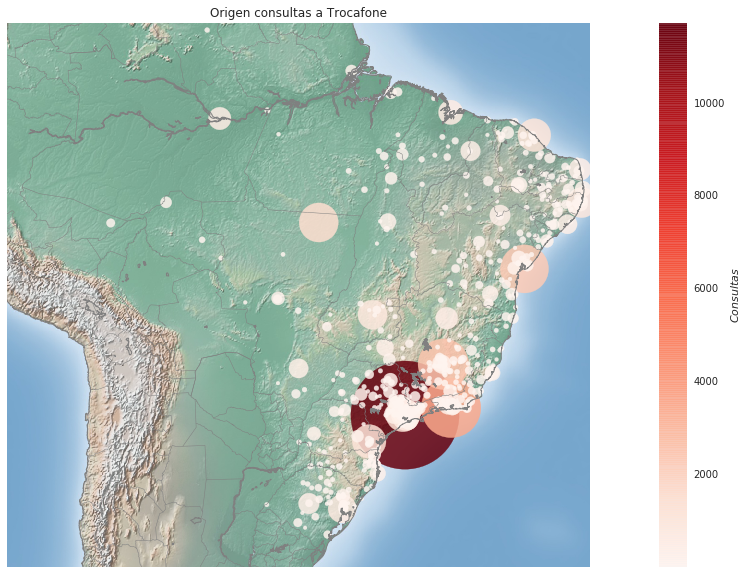

In [24]:
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(25, 10))
plt.title('Origen consultas a Trocafone')
m = Basemap(projection='lcc', resolution='h', 
            lat_0=-15.37, lon_0=-54.63,
            width=4.5E6, height=4.2E6)

m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
scale = 2.5
m.scatter(lon, lat, latlon=True, c=count, cmap='Reds', alpha=0.85, s=count)
plt.colorbar(label=r'$Consultas$')
plt.clim(1, df['count'].max())
plt.legend(scatterpoints=1, frameon=False, labelspacing=1);
fig.savefig('img/origen-visitas-trocafone-2.png')

# Comportamientos dentro de una sesion

In [5]:
df = events

In [6]:
from juanFunciones import filteredDf, validColumns
from juanFunciones import generateSessions as genSes

In [7]:
validColumns(df)

{'ad campaign hit': array(['url', 'campaign_source'], dtype=object),
 'brand listing': array(['skus'], dtype=object),
 'checkout': array(['sku', 'model', 'condition', 'storage', 'color'], dtype=object),
 'conversion': array(['sku', 'model', 'condition', 'storage', 'color'], dtype=object),
 'generic listing': array(['skus'], dtype=object),
 'lead': array(['model'], dtype=object),
 'search engine hit': array(['search_engine'], dtype=object),
 'searched products': array(['skus', 'search_term'], dtype=object),
 'staticpage': array(['staticpage'], dtype=object),
 'viewed product': array(['sku', 'model', 'condition', 'storage', 'color'], dtype=object),
 'visited site': array(['channel', 'new_vs_returning', 'city', 'region', 'country',
        'device_type', 'screen_resolution', 'operating_system_version',
        'browser_version'], dtype=object)}

In [8]:
sessions = genSes(df, "10 min")
df["session_num"] = sessions

/home/tbotalla/workspace/orga2018/juanFunciones.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [9]:
df.head(2)

timestamp            event    person                        url  \
0 2018-05-31 23:38:05  ad campaign hit  0004b0a2  /comprar/iphone/iphone-5s   
1 2018-05-31 23:38:05     visited site  0004b0a2                        NaN   

   sku model condition storage color skus search_term staticpage  \
0  NaN   NaN       NaN     NaN   NaN  NaN         NaN        NaN   
1  NaN   NaN       NaN     NaN   NaN  NaN         NaN        NaN   

  campaign_source search_engine channel new_vs_returning        city  \
0          criteo           NaN     NaN              NaN         NaN   
1             NaN           NaN    Paid              New  Camaragibe   

       region country device_type screen_resolution operating_system_version  \
0         NaN     NaN         NaN               NaN                      NaN   
1  Pernambuco  Brazil  Smartphone           360x640                Android 6   

    browser_version  session_num  
0               NaN            0  
1  Chrome Mobile 39            0

In [10]:
df['event'] = df['event'].astype(str) # Para poder concatenar
df['eventos_sesion'] = df.groupby(["person", "session_num"])['event'].transform(lambda x: "%s" % ', '.join(x))

In [11]:
df['eventos_sesion'].head(15)

0     ad campaign hit, visited site, viewed product,...
1     ad campaign hit, visited site, viewed product,...
2     ad campaign hit, visited site, viewed product,...
3     ad campaign hit, visited site, viewed product,...
4     viewed product, visited site, ad campaign hit,...
5     viewed product, visited site, ad campaign hit,...
6     viewed product, visited site, ad campaign hit,...
7     viewed product, visited site, ad campaign hit,...
8     generic listing, visited site, search engine h...
9     generic listing, visited site, search engine h...
10    generic listing, visited site, search engine h...
11    generic listing, visited site, search engine h...
12    generic listing, visited site, search engine h...
13    generic listing, visited site, search engine h...
14    brand listing, ad campaign hit, visited site, ...
Name: eventos_sesion, dtype: object

In [12]:
%%time
def group_events(events):
    new_events = {}
    for i in events.split(','):
        event = i.strip() 
        if new_events.get(event) == None:
            new_events[event] = 1
        else:
            new_events[event] = new_events.get(event) + 1

    return new_events

df['eventos_sesion'] = df['eventos_sesion'].apply(group_events)

CPU times: user 16.3 s, sys: 604 ms, total: 17 s
Wall time: 17 s


In [14]:
df['eventos_sesion'].head(2)

0    {'ad campaign hit': 1, 'visited site': 1, 'vie...
1    {'ad campaign hit': 1, 'visited site': 1, 'vie...
Name: eventos_sesion, dtype: object

In [15]:
df.to_csv('eventos_sesion.csv')

In [5]:
df = pd.read_csv('eventos_sesion.csv')

/home/tbotalla/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.



In [7]:
df['eventos_sesion'].value_counts().head(5)

{'viewed product': 1, 'visited site': 1}                                         6262
{'visited site': 1, 'ad campaign hit': 1, 'viewed product': 1, 'checkout': 1}    4540
{'ad campaign hit': 1, 'visited site': 1, 'viewed product': 1, 'checkout': 1}    4228
{'viewed product': 1, 'visited site': 1, 'ad campaign hit': 1}                   3876
{'viewed product': 1, 'ad campaign hit': 1, 'visited site': 1}                   3354
Name: eventos_sesion, dtype: int64

In [10]:
sns_plot = sns.countplot(y='eventos_sesion', data=df, palette="Greens_d",
              order=df.eventos_sesion.value_counts().head(35).index)

sns_plot.set_title("Comportamientos mas frecuentes dentro de una sesión")
sns_plot.set_yticklabels(sns_plot.get_yticklabels(), fontsize=6.5)
fig = sns_plot.get_figure()
fig.savefig("img/comportamientos-frecuentes.png", bbox_inches = 'tight', label='small')
sns_plot

In [9]:
# Viejo

**Que columnas aplican para cada evento**

In [23]:
viewed_product_events = events[events["event"] == "viewed product"].dropna(axis=1, how='all')
viewed_product_events.notnull().any()

timestamp    True
event        True
person       True
sku          True
model        True
condition    True
storage      True
color        True
dtype: bool

In [116]:
brand_listing_events = events[events["event"] == "brand listing"].dropna(axis=1, how='all')
brand_listing_events.notnull().any()

timestamp    True
event        True
person       True
skus         True
dtype: bool

**Evento visited site, se ingresa directamente a la url**

In [11]:
visited_site_events = events[events["event"] == "visited site"].dropna(axis=1, how='all')
visited_site_events.notnull().any()

timestamp                   True
event                       True
person                      True
channel                     True
new_vs_returning            True
city                        True
region                      True
country                     True
device_type                 True
screen_resolution           True
operating_system_version    True
browser_version             True
dtype: bool

In [13]:
visited_site_events['channel'].value_counts()
# Organic == buscador
# Direct == url
# Paid == publicidad en buscador
# Referral == fuente referral: facebook, tripadvisor, bing

Paid        44193
Direct      18522
Organic     12348
Referral    11384
Social        846
Email          76
Unknown         9
Name: channel, dtype: int64

In [118]:
visited_site_events['browser_version'].isnull().any()

False

In [119]:
visited_site_events['browser_version'] = visited_site_events['browser_version'].replace(np.nan, '', regex=True)
visited_site_events['browser_version'] = visited_site_events['browser_version'].astype(str)
visited_site_events['browser_version'].isnull().any()

False

In [120]:
visited_site_events['browser_version'].value_counts().head(10)

Chrome 66.0           22611
Chrome Mobile 66.0    17513
Chrome 65.0            6635
Chrome Mobile 65.0     5665
Chrome Mobile 64.0     3083
Chrome 67.0            3073
Chrome Mobile 67.0     2683
Chrome 64.0            2450
Mobile Safari 11       2071
Chrome Mobile 39       1639
Name: browser_version, dtype: int64

In [121]:
def mapear_browsers(row):
    if row != '':
        if re.search('Chrome', row, re.IGNORECASE): 
            row = 'Chrome'
        elif re.search('Firefox', row, re.IGNORECASE): 
            row = 'Firefox'
        elif re.search('Mozilla', row, re.IGNORECASE): 
            row = 'Firefox'
        elif re.search('Safari', row, re.IGNORECASE): 
            row = 'Safari'
        elif re.search('Opera', row, re.IGNORECASE): 
            row = 'Opera'
        elif re.search('IE', row, re.IGNORECASE): 
            row = 'IE'
        elif re.search('Explorer', row, re.IGNORECASE): 
            row = 'IE'        
        elif re.search('Edge', row, re.IGNORECASE): 
            row = 'Edge'        
        else:
            row = 'Otro'
    return row    

In [122]:
visited_site_events['browser_version'] = visited_site_events['browser_version'].apply(lambda row: mapear_browsers(row))

In [123]:
navegadores = ['Chrome', 'Otro', 'Safari', 'Firefox', 'Edge', 'Opera', 'IE']
num_items = len(navegadores)
plt.figure(figsize=(18,8))
margin = 0.05
width = 7*(1.-1*margin)/num_items
plt.title('Uso de navegadores web', fontsize=18)
plt.xlabel('Navegador', fontsize=16)
plt.ylabel('Cantidad(%)', fontsize=16)
plt.bar(navegadores, 100 * visited_site_events.browser_version.value_counts()/len(visited_site_events), width, color="cadetblue")

<BarContainer object of 7 artists>

In [205]:
# Screen resolution
print(visited_site_events['screen_resolution'].isnull().any())
visited_site_events['screen_resolution'].value_counts().head(5)

False


360x640      30009
1366x768     21379
320x534       3622
1920x1080     3521
320x570       2561
Name: screen_resolution, dtype: int64

In [206]:
visited_site_events.head(1)

timestamp         event    person channel new_vs_returning  \
1 2018-05-31 23:38:05  visited site  0004b0a2    Paid              New   

         city      region country device_type screen_resolution  \
1  Camaragibe  Pernambuco  Brazil  Smartphone           360x640   

  operating_system_version browser_version  
1                Android 6          Chrome

In [ ]:
grouped_screen = visited_site_events.groupby(['screen_resolution']).

In [209]:
# Sistema operativo
visited_site_events['operating_system_version'].value_counts().head(10)

Windows 7        19675
Windows 10       17110
Android 7         9964
Android 6.0.1     7805
Android 6         6871
Android 5.1.1     4123
Android 7.1.1     3325
Windows 8.1       2781
Android 5.0.2     1640
Android 4.4.2     1402
Name: operating_system_version, dtype: int64

In [211]:
# Tipo de dispositivo
visited_site_events['device_type'].value_counts()

Smartphone    44239
Computer      41790
Tablet         1234
Unknown         115
Name: device_type, dtype: int64

**Evento ad campaign hit, se ingresa mediante campaña de marketing**

In [124]:
ad_campaign_hits_events = events[events["event"] == "ad campaign hit"].dropna(axis=1, how='all')
ad_campaign_hits_events.notnull().any()

timestamp          True
event              True
person             True
url                True
campaign_source    True
dtype: bool

Text(0.5,1,'Origen campañas de marketing')

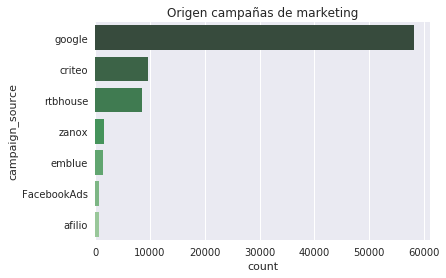

In [125]:
sns.countplot(y="campaign_source", data=ad_campaign_hits_events, palette="Greens_d",
              order=ad_campaign_hits_events.campaign_source.value_counts().iloc[:7].index).set_title("Origen campañas de marketing")

**Evento generic listing, productos vistos en el home**

In [126]:
generic_listing_events = events[events["event"] == "generic listing"].dropna(axis=1, how='all')
generic_listing_events.notnull().any()

timestamp    True
event        True
person       True
skus         True
dtype: bool

**Evento search engine hit, busqueda mediante motor externo**

In [127]:
search_engine_events = events[events["event"] == "search engine hit"].dropna(axis=1, how='all')
search_engine_events.notnull().any()

timestamp        True
event            True
person           True
search_engine    True
dtype: bool

In [128]:
search_engine_events['search_engine'].value_counts()

Google    50240
Bing        424
Yahoo       287
Ask           6
Name: search_engine, dtype: int64

**Evento checkout, usuario entra al checkout de un producto**

In [129]:
checkout_events = events[events["event"] == "checkout"].dropna(axis=1, how='all')
checkout_events.notnull().any()

timestamp    True
event        True
person       True
sku          True
model        True
condition    True
storage      True
color        True
dtype: bool

**Evento static page, el usuario visita directamente el sitio**

In [28]:
staticpage_events = events[events["event"] == "staticpage"].dropna(axis=1, how='all')
staticpage_events.notnull().any()

timestamp     True
event         True
person        True
staticpage    True
dtype: bool

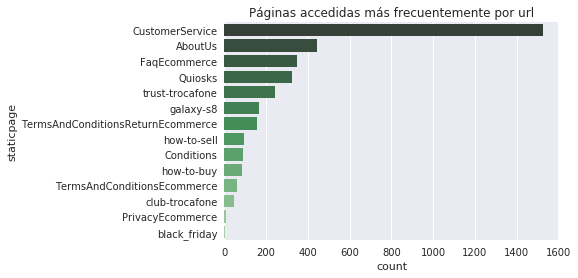

In [30]:
staticpage_events['staticpage'].value_counts()

sns_plot = sns.countplot(y="staticpage", data=staticpage_events, palette="Greens_d",
              order=staticpage_events.staticpage.value_counts().iloc[:15].index)
sns_plot.set_title("Páginas accedidas más frecuentemente por url")
fig = sns_plot.get_figure()
fig.savefig("img/paginas-accedidas-url.png", bbox_inches = 'tight', label='small')
sns_plot

**Evento conversion, es el "trueque"**

In [24]:
conversion_events = events[events["event"] == "conversion"].dropna(axis=1, how='all')
conversion_events.notnull().any()

timestamp    True
event        True
person       True
sku          True
model        True
condition    True
storage      True
color        True
dtype: bool

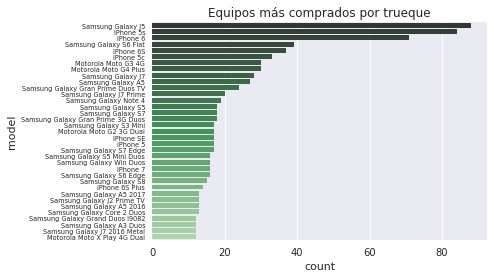

In [26]:
sns_plot = sns.countplot(y="model", data=conversion_events, palette="Greens_d",
              order=conversion_events.model.value_counts().iloc[:35].index)
sns_plot.set_title("Equipos más comprados por trueque")
sns_plot.set_yticklabels(sns_plot.get_yticklabels(), fontsize=6.5)
fig = sns_plot.get_figure()
fig.savefig("img/equipos-comprados-trueque.png", bbox_inches = 'tight', label='small')
sns_plot

**Evento lead, se anota en lista de espera para cuando haya stock de un producto**

In [15]:
lead_events = events[events["event"] == "lead"].dropna(axis=1, how='all')
lead_events.notnull().any()

timestamp    True
event        True
person       True
model        True
dtype: bool

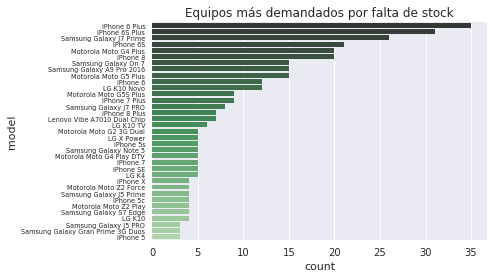

In [22]:
sns_plot = sns.countplot(y="model", data=lead_events, palette="Greens_d",
              order=lead_events.model.value_counts().iloc[:35].index)
sns_plot.set_title("Equipos más demandados por falta de stock")
sns_plot.set_yticklabels(sns_plot.get_yticklabels(), fontsize=6.5)
fig = sns_plot.get_figure()
fig.savefig("img/equipos-falta-stock.png", bbox_inches = 'tight', label='small')
sns_plot